In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from scipy.special import logsumexp
from scipy.optimize import curve_fit

In [2]:
loss_df = pd.read_csv('spanish_wiki_loss.csv')
loss_df['mean_loss'] = loss_df.iloc[:, 1:].mean(axis=1)
loss_df

,name,10,9,8,7,6,5,4,3,2,1,mean_loss
0,layers16_dim576_epochs1,1.92421,1.89914,1.91566,1.89248,1.84005,1.74314,1.89068,1.74817,1.82076,1.91476,1.858905
1,layers16_dim576_epochs2,1.52350,1.79921,1.68849,1.79517,1.73811,1.74850,1.75269,1.73625,1.89374,1.54923,1.722489
2,layers16_dim576_epochs3,1.69888,1.65376,1.53152,1.66556,1.79024,1.83836,1.78932,1.68700,1.80178,1.65271,1.710913
3,layers16_dim576_epochs4,1.68065,1.62131,1.65892,1.74362,1.71931,1.62734,1.75062,1.66466,1.82057,1.71065,1.699765
4,layers16_dim960_epochs1,1.82345,1.79685,1.81398,1.78986,1.73664,1.62249,1.78801,1.62803,1.72513,1.81593,1.754037
5,layers16_dim960_epochs2,1.39609,1.67755,1.57228,1.67571,1.61649,1.62529,1.62941,1.61551,1.78513,1.42241,1.601587
6,layers16_dim960_epochs3,1.59667,1.53234,1.40187,1.53524,1.67048,1.72129,1.68039,1.55708,1.68337,1.53215,1.591088
7,layers16_dim960_epochs4,1.57754,1.49106,1.51544,1.63012,1.56860,1.49787,1.62372,1.52116,1.68803,1.56811,1.568165
8,layers24_dim576_epochs1,1.88706,1.86154,1.87828,1.85472,1.80275,1.69941,1.85276,1.70448,1.78482,1.87782,1.820364
9,layers24_dim576_epochs2,1.47815,1.75632,1.64797,1.75218,1.69551,1.70384,1.70780,1.69376,1.85507,1.50382,1.679442


In [5]:
N_data = np.array([113_265_216]*4 + [251_689_920]*4 + [141_585_984]*4 + [330_348_480]*4 + [169_906_752]*4 + [409_007_040]*4, dtype=np.float64)

epoch_tokens = 2_082_285_568
D_data = np.array([epoch_tokens, epoch_tokens*2, epoch_tokens*3, epoch_tokens*4]*6, dtype=np.float64)

L_data = loss_df['mean_loss'].to_numpy()

flops = 6 * N_data * D_data

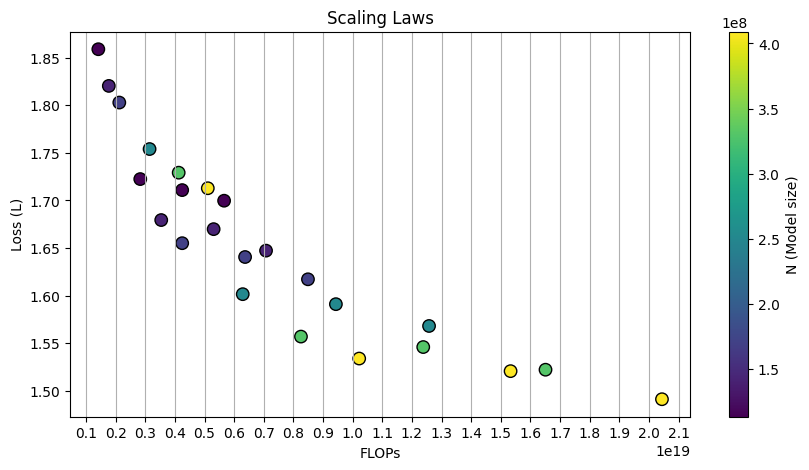

In [11]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Make a 2D scatter plot where color = L_data
scatter_plot = ax.scatter(
    x=flops,
    y=L_data,
    c=N_data,          # Color encode the loss
    cmap='viridis',    # Choose any matplotlib colormap
    s=80,              # Marker size
    edgecolors='black' # Optional styling
)

# Add a colorbar indicating the range of L values
cbar = plt.colorbar(scatter_plot, ax=ax)
cbar.set_label("N (Model size)")

# Label your axes
ax.set_xlabel("FLOPs")
ax.set_ylabel("Loss (L)")

plt.xticks(np.arange(0.1e19, 2.2e19, 0.1e19, dtype=np.float64))
ax.grid(which='major', axis='x', linestyle='-')

#ax.xaxis.grid()
plt.title("Scaling Laws")

plt.show()

In [12]:
def scaling_law_log(data, E, A, alpha, B, beta):
    N, D = data
    lse_terms = [np.array([E]*len(N)), A - (alpha * np.log(N)), B - (beta * np.log(D))]
    return logsumexp(lse_terms, axis=0)

In [13]:
p0 = [1.0, 10000, 0.5, 10000, 0.5]

# Fit the curve
popt, pcov = curve_fit(scaling_law_log, (N_data, D_data), np.log(L_data), p0=p0)
E_fit, A_fit, alpha_fit, B_fit, beta_fit = popt

In [14]:
print("Fitted parameters:")
print("  E      =", math.exp(E_fit))
print("  A      =", math.exp(A_fit))
print("  alpha  =", alpha_fit)
print("  B      =", math.exp(A_fit))
print("  beta  =", beta_fit)

Fitted parameters:
  E      = 1.1409562605377408
  A      = 202.25757644481146
  alpha  = 0.31944032803120476
  B      = 202.25757644481146
  beta  = 2.2612764165429295
